In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# <font color = 'blue'>1. EDA of the dataset

Dataset original source: https://www.kaggle.com/c/titanic/data?select=train.csv

Columns Info:
<br>
SibSp = Number of Sibling & Spouse
<br>
Parch = Number of Parent & Children
<br>
Embarked = Where does the passenger mounted from , S = Southampton, C = Cherbourg, Q = Queenstown

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <font color = 'blue'>1.1 Preprocessing, Cleaning, And Imputation

In [4]:
df['CabinClass'] = df['Cabin'].str[0]

In [5]:
df['CabinClass'].fillna('Unknown', inplace = True)

In [6]:
df['Embarked'].fillna('Unknown', inplace = True)

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [8]:
#Dimensionality Reduction, drop Cabin since I had create new column 'CabinClass'
df.drop(columns = {'Cabin'}, inplace = True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinClass     0
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <font color = 'blue'>1.2 Finding some pattern or potential co-relationship to Survival

#### <font color = 'blue'>1.2.1 Pclass

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown


Text(0.5, 0, 'Pclass(Figure 1)')

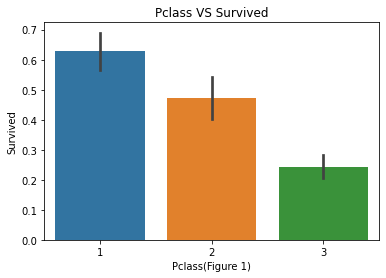

In [12]:
sns.barplot(data = df, x= 'Pclass', y ='Survived') 
plt.title('Pclass VS Survived')
plt.xlabel('Pclass(Figure 1)')
# we saw that, as the P class higher, the survived number tend to be higher # Use this for one of our features

#### <font color = 'blue'>1.2.2 Sex

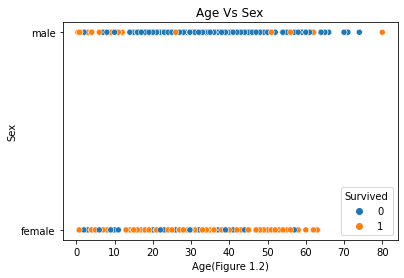

In [13]:
sns.scatterplot(data = df, x ='Age', y='Sex', hue = 'Survived')
plt.title('Age Vs Sex')
plt.xlabel('Age(Figure 1.2)');
# We found an insightful info, seem like female had a higher chance of survived

In [14]:
df[['Sex','Survived']].value_counts(normalize = True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
dtype: float64

#### <font color = 'blue'>1.2.3 Age

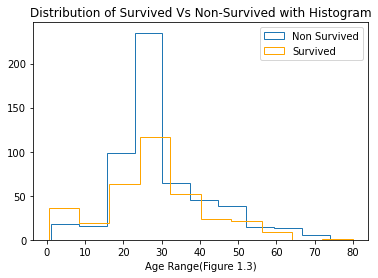

In [15]:
# Does age affect the chance of survival
#subset the data into two, survived & non-survived, plot with matplotlib
df_non_survived = df.query('Survived==0')
df_survived = df.query('Survived==1')
plt.hist(x = df_non_survived['Age'], histtype = 'step', label ='Non Survived')
plt.hist(x = df_survived['Age'], histtype = 'step', label = 'Survived', color = "orange")
plt.legend()
plt.title('Distribution of Survived Vs Non-Survived with Histogram')
plt.xlabel('Age Range(Figure 1.3)')
plt.show()
# We can see, lower age tend to has a higher rate of survived

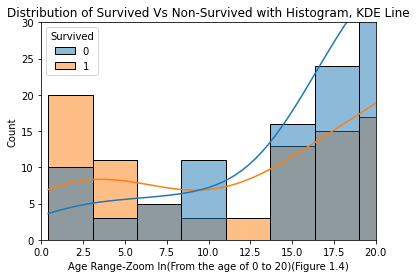

In [16]:
sns.histplot(data = df, x = 'Age', hue = 'Survived', kde = True)
plt.title('Distribution of Survived Vs Non-Survived with Histogram, KDE Line')
plt.axis([0, 20, 0,30])
plt.xlabel('Age Range-Zoom In(From the age of 0 to 20)(Figure 1.4)');
#We confirmed that, lower age have a better rate of survived as the kde line is on top of blue line

#### <font color = 'blue'>1.2.4 SibSp

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown


In [18]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
CabinClass     False
dtype: bool

In [19]:
df_sibsp = df.groupby(['SibSp','Survived'])['PassengerId'].count().reset_index()
df_sibsp.rename(columns ={'PassengerId':'PassengerCount'}, inplace = True)
df_sibsp

,SibSp,Survived,PassengerCount
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


Text(0.5, 0, 'SibSp(Figure 1.5)')

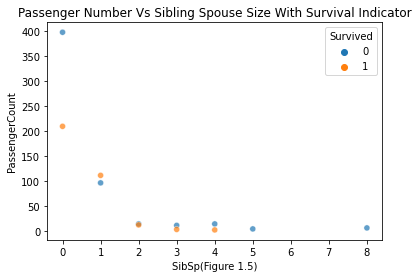

In [20]:
sns.scatterplot(data = df_sibsp, x ='SibSp', y='PassengerCount', hue = 'Survived', marker ='o', alpha =0.7)
plt.title('Passenger Number Vs Sibling Spouse Size With Survival Indicator');
plt.xlabel('SibSp(Figure 1.5)')
# We can see with sibsp of 1, had the highest survival chance among the others size of sibsp
# Surprisingly ideal size is 1, despite the balance ratio of each Sibsp size given.
# Therefore, we knew sibsp number might affect the passenger survival chance, although we knew there are a lot of consideration

#### <font color = 'blue'>1.2.5 Parch

In [21]:
df_parch = df.groupby(['Parch','Survived'])['PassengerId'].count().reset_index()
df_parch.rename(columns ={'PassengerId':'PassengerCount'}, inplace = True)
df_parch

,Parch,Survived,PassengerCount
0,0,0,445
1,0,1,233
2,1,0,53
3,1,1,65
4,2,0,40
5,2,1,40
6,3,0,2
7,3,1,3
8,4,0,4
9,5,0,4


Text(0.5, 0, 'Parch(Figure 1.6)')

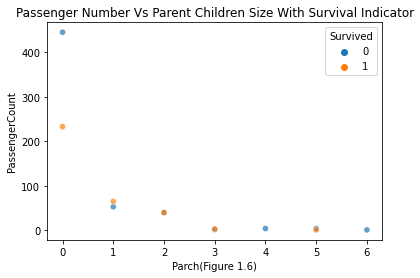

In [22]:
sns.scatterplot(data = df_parch, x ='Parch', y='PassengerCount', hue = 'Survived', marker ='o', alpha = 0.7)
plt.title('Passenger Number Vs Parent Children Size With Survival Indicator');
plt.xlabel('Parch(Figure 1.6)')

#### <font color = 'blue'>1.2.6 Fare

(20.0, 80.0)

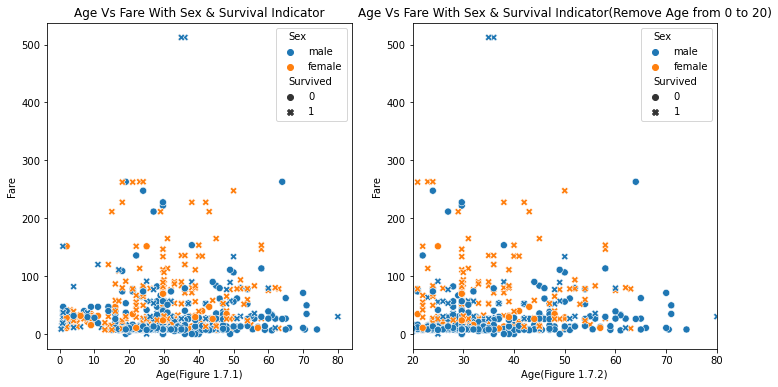

In [23]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.scatterplot(data = df, x= 'Age', y ='Fare', hue = 'Sex', style = 'Survived', x_jitter = .55, y_jitter = .55,s =50, ax = ax[0])
ax[0].set_title('Age Vs Fare With Sex & Survival Indicator')
ax[0].set_xlabel('Age(Figure 1.7.1)')
# We saw that survived passenger is paid more fares than those non-survived passenger, despite of the gender
# its kind of messy, additional anaylsis required

sns.scatterplot(data = df, x= 'Age', y ='Fare', hue = 'Sex', style = 'Survived', x_jitter = .55, y_jitter = .55,s =50, ax = ax[1])
ax[1].set_title('Age Vs Fare With Sex & Survival Indicator(Remove Age from 0 to 20)') # Because we knew age, children had priority to board the life boat
ax[1].set_xlabel('Age(Figure 1.7.2)')
ax[1].set_xlim([20,80])

#### <font color = 'blue'>1.2.7 Cabin Type

In [24]:
df_cabinclass = df.groupby(['CabinClass', 'Survived'])['PassengerId'].count().reset_index()
df_cabinclass.rename(columns={'PassengerId':'PassengerCount'}, inplace = True)
df_cabinclass
# First glance, we look at those passenger who is being assigned to cabin class, is survived more than those unknown

,CabinClass,Survived,PassengerCount
0,A,0,8
1,A,1,7
2,B,0,12
3,B,1,35
4,C,0,24
5,C,1,35
6,D,0,8
7,D,1,25
8,E,0,8
9,E,1,24


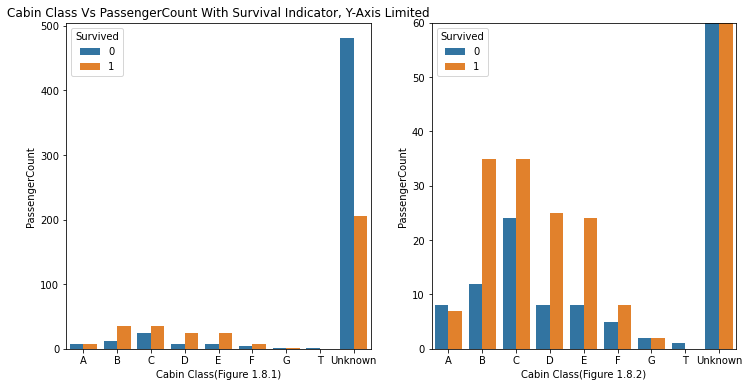

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data = df_cabinclass, x ='CabinClass', y='PassengerCount', hue = 'Survived', ax= ax[0])
ax[0].set_title('Cabin Class Vs PassengerCount With Survival Indicator')
ax[0].set_xlabel('Cabin Class(Figure 1.8.1)')

sns.barplot(data = df_cabinclass, x ='CabinClass', y='PassengerCount', hue = 'Survived', ax= ax[1])
ax[0].set_title('Cabin Class Vs PassengerCount With Survival Indicator, Y-Axis Limited')
ax[1].set_ylim([0,60])
ax[1].set_xlabel('Cabin Class(Figure 1.8.2)');

Text(0.5, 0, 'Cabin Class(Figure 1.9.2)')

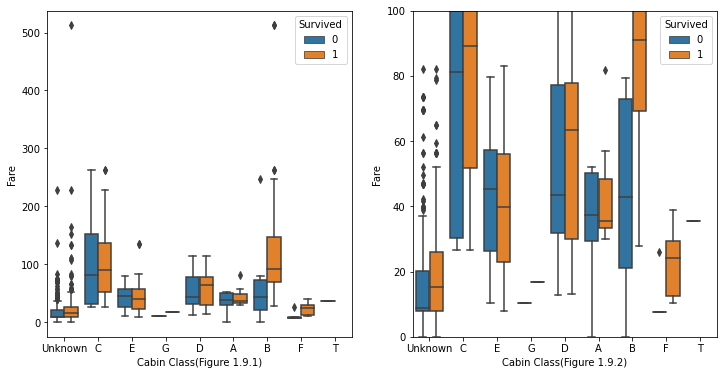

In [26]:
fig, ax = plt.subplots(1,2, figsize =(12,6))
sns.boxplot(data =df, x='CabinClass', y='Fare', hue = 'Survived', ax = ax[0])
ax[0].set_xlabel('Cabin Class(Figure 1.9.1)')

sns.boxplot(data =df, x='CabinClass', y='Fare', hue='Survived', ax = ax[1])
ax[1].set_ylim([0,100])
ax[1].set_xlabel('Cabin Class(Figure 1.9.2)')
# Seem like most of the 'Unknown' cabin class passengers are those who paid lower fares,
# which also proved that higher fare you paid, there are higher chance you get an assigned cabin class

# IMPORTANT NOTE, LOOK AT THE UNKNOWN CLASS, WE SAW THERE ARE SOME PASSENGER WHO PAID VERY HIGH FARES. HOWEVER, THEY DOESN'T 
# ASSIGNED TO ANY CABIN CLASS, THEREFORE, I CONCLUDEd THERE CAN BE DATA RECORDING ISSUES, WHICH MIGHT NOT REFLECTING THE ACTUAL SITUATION

# CONCLUSION, I DON'T USE THIS VARIABLE AS FEATURE. NEVERTHELESS, ONCE AGAIN, WE LOOK AT THE SURVIVAL TYPE, HIGHER FARE HAD HIGHER CHANCE TO SURVIVE
# REFERRED TO FIGURE 1.7

#### <font color = 'blue'>1.2.8 Embarked

In [27]:
df_embarked = df.groupby(['Embarked', 'Survived'])['PassengerId'].count().reset_index()
df_embarked.rename(columns = {'PassengerId':'PassengerCount'}, inplace = True)
df_embarked

,Embarked,Survived,PassengerCount
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217
6,Unknown,1,2


Text(0.5, 0, 'Parch(Figure 1.10)')

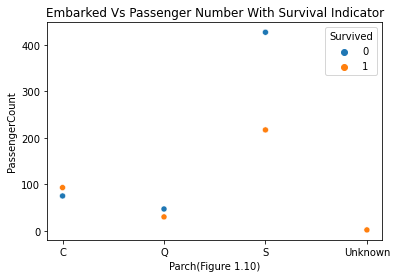

In [28]:
sns.scatterplot(data = df_embarked, x ='Embarked', y='PassengerCount', hue = 'Survived')
plt.title('Embarked Vs Passenger Number With Survival Indicator');
plt.xlabel('Parch(Figure 1.10)')
# We can see that passenger coming from C embarked point had higher survival chance when compared to others (Q,S)


In [29]:
# Futher check with embarked vs fare

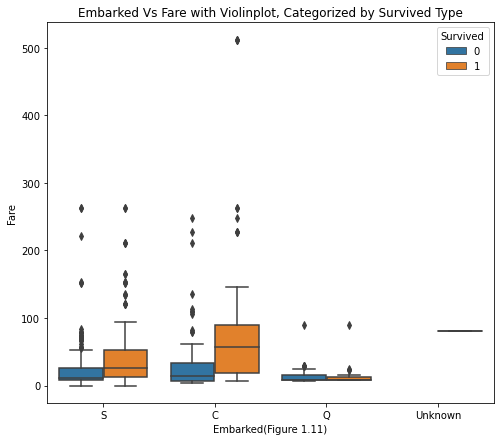

In [30]:
plt.figure(figsize = (8,7))
sns.boxplot(data = df, x = 'Embarked',y ='Fare', hue = 'Survived')
plt.title('Embarked Vs Fare with Violinplot, Categorized by Survived Type')
plt.xlabel('Embarked(Figure 1.11)');
# we knew that embarked C passenger tend to be paid more than the other embarked station (S, Q)
# which also proved that our assumptions is true, referred to figure 1.7,
# higher fare the passenger paid, more likely they will survived

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown


# <font color = 'blue'>2. Identified Useful Features for ML model, Y is 'Survived'
    1. Pclass(1.2.1)
    2. Sex(1.2.2)
    3. Age(1.2.3)
    4. SibSp(1.2.4)
    5. Parch(1.2.5)
    6. Fare(1.2.6)
    7. Embarked(1.2.8)
__I decided not to use 'PassengerId', 'Name','Cabin Class(Referred to 1.2.7)' and 'Ticket' when take consideration of Dimensonality Reduction__

# <font color ='blue'>3. Categorical Features Encoder

In [32]:
# Encoding those selected categorical features before training the model
le = LabelEncoder()
df['EncodedSex']= le.fit_transform(df['Sex'])
df['EncodedEmbarked']= le.fit_transform(df['Embarked'])
cleaned_df = df.drop(columns = ['PassengerId', 'Sex','Name','Ticket','Embarked','CabinClass'])
cleaned_df

,Survived,Pclass,Age,SibSp,Parch,Fare,EncodedSex,EncodedEmbarked
0,0,3,22.000000,1,0,7.2500,1,2
1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,26.000000,0,0,7.9250,0,2
3,1,1,35.000000,1,0,53.1000,0,2
4,0,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,2
887,1,1,19.000000,0,0,30.0000,0,2
888,0,3,29.699118,1,2,23.4500,0,2
889,1,1,26.000000,0,0,30.0000,1,0


# <font color ='blue'>4. Model Training

### <font color ='blue'>4.1 Training Test Split

In [33]:
x = cleaned_df.drop(['Survived'], axis =1) 

# these are the low feature importances column from rfc ['Parch', 'EncodedEmbarked']
# if removing above 2 columns, it increase our RFC performance better

y = cleaned_df['Survived']

sc= StandardScaler()
x_scaled = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = .2, random_state = 5)




##### <font color = 'blue'>4.2 LOGISTIC REGRESSION

In [34]:
log_regr = LogisticRegression()
log_regr.fit(x_train, y_train)
print(log_regr.score(x_test, y_test))
y_predict = log_regr.predict(x_test)

0.8212290502793296


In [35]:
# Various of reports
df_log_compare = pd.DataFrame({'Actual':y_test, 'Predict':y_predict})
print(log_regr.coef_)

print('\n(Predict & Actual)=1 Divided by (Actual)=1 : ' +str(len(df_log_compare[(df_log_compare['Actual']==1)& \
                                                    (df_log_compare['Predict']==1)])/len(df_log_compare[df_log_compare['Actual']==1])))
print('\n')
print(metrics.classification_report(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[-0.96045788 -0.50178799 -0.34023812 -0.05107143 -0.05866167 -1.30307072
  -0.19802533]]

(Predict & Actual)=1 Divided by (Actual)=1 : 0.7058823529411765


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

0.8212290502793296


##### <font color ='blue'>4.3 RANDOM FOREST CLASSIFIER

In [36]:
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 5)
rfc.fit(x_train, y_train)
print(rfc.score(x_test,y_test))
y_rfc_predict = rfc.predict(x_test)

0.8324022346368715


In [37]:
df_rfc_compare =pd.DataFrame({'Actual':y_test, 'Predict':y_rfc_predict})
print(rfc.feature_importances_)
print('\n(Predict & Actual)=1 Divided by (Actual)=1 : ' +str(len(df_rfc_compare[(df_rfc_compare['Actual']==1)& \
                                                    (df_rfc_compare['Predict']==1)])/len(df_rfc_compare[df_rfc_compare['Actual']==1])))
print('\n')
print(metrics.classification_report(y_test,y_rfc_predict))

[0.08044074 0.28389541 0.0528381  0.04042283 0.28375646 0.22075699
 0.03788947]

(Predict & Actual)=1 Divided by (Actual)=1 : 0.7352941176470589


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



#####  <font color = 'blue'>4.4 K Nearest Neighbours

In [38]:
result_k_loop = {}

for i in range(1,21):
    
    knc = KNeighborsClassifier(n_neighbors= i)
    knc.fit(x_train,y_train)
    result = knc.score(x_test,y_test)
    result_k_loop[i] = result
    
result_k_loop 

{1: 0.8156424581005587,
 2: 0.8044692737430168,
 3: 0.8324022346368715,
 4: 0.8268156424581006,
 5: 0.8547486033519553,
 6: 0.8435754189944135,
 7: 0.8212290502793296,
 8: 0.8547486033519553,
 9: 0.8379888268156425,
 10: 0.8268156424581006,
 11: 0.8435754189944135,
 12: 0.8379888268156425,
 13: 0.8435754189944135,
 14: 0.8379888268156425,
 15: 0.8379888268156425,
 16: 0.8547486033519553,
 17: 0.8547486033519553,
 18: 0.8603351955307262,
 19: 0.8603351955307262,
 20: 0.8659217877094972}

In [39]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
print(knc.score(x_test, y_test))
y_knc_predict = knc.predict(x_test)

0.8547486033519553


In [40]:
df_knc_compare =pd.DataFrame({'Actual':y_test, 'Predict':y_knc_predict})
#before removing most least importances feature from rfc.feature_importances, knc higher than rfc
print('(Predict & Actual)=1 Divided by (Actual)=1 : ' +str(len(df_knc_compare[(df_knc_compare['Actual']==1)& \
                                            (df_knc_compare['Predict']==1)])/len(df_knc_compare[df_knc_compare['Actual']==1])))
print('\n')
print(metrics.classification_report(y_test,y_rfc_predict))

(Predict & Actual)=1 Divided by (Actual)=1 : 0.7941176470588235


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [41]:
df_rfc_compare =pd.DataFrame({'Actual':y_test, 'Predict':y_rfc_predict})
print(rfc.feature_importances_)
print('\n(Predict & Actual)=1 Divided by (Actual)=1 : ' +str(len(df_rfc_compare[(df_rfc_compare['Actual']==1)& \
                                                    (df_rfc_compare['Predict']==1)])/len(df_rfc_compare[df_rfc_compare['Actual']==1])))
print('\n')
print(metrics.classification_report(y_test,y_rfc_predict))

[0.08044074 0.28389541 0.0528381  0.04042283 0.28375646 0.22075699
 0.03788947]

(Predict & Actual)=1 Divided by (Actual)=1 : 0.7352941176470589


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# <font color ='blue'>5. Select The Best Machine Learning Model From 3 Options

##### <font color ='blue'> Why I choose Random Forest Classifier:

First of all, logistic regression might not the best model in my case. Random Forest & K Neighbor Classifier have the same score in the accuracy, Both 83% from the classification report. However, Random Forest can be refine further easily by accessing it's feature importances and filter the two or three least importance features to achieve the dimensionality reduction.


In [42]:
pd.DataFrame(rfc.feature_importances_, index = x.columns.values, columns = ['Importance Rate']).reset_index().sort_values(by ='Importance Rate', ascending = False)

,index,Importance Rate
1,Age,0.283895
4,Fare,0.283756
5,EncodedSex,0.220757
0,Pclass,0.080441
2,SibSp,0.052838
3,Parch,0.040423
6,EncodedEmbarked,0.037889


In [43]:
# Applying my concept, Filter out the 3 least importances features
x = cleaned_df.drop(['Survived','SibSp','Parch','EncodedEmbarked'], axis =1) 

y = cleaned_df['Survived']
sc= StandardScaler()
x_scaled = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = .2, random_state = 5)

In [44]:
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 5)
rfc.fit(x_train, y_train)
print(rfc.score(x_test,y_test))
y_rfc_predict = rfc.predict(x_test)

0.8603351955307262


In [45]:
df_rfc_compare =pd.DataFrame({'Actual':y_test, 'Predict':y_rfc_predict})
print(rfc.feature_importances_)
print('\n(Predict & Actual)=1 Divided by (Actual)=1 : ' +str(len(df_rfc_compare[(df_rfc_compare['Actual']==1)& \
                                                    (df_rfc_compare['Predict']==1)])/len(df_rfc_compare[df_rfc_compare['Actual']==1])))
print('\n')
print(metrics.classification_report(y_test,y_rfc_predict))


[0.09212389 0.31757544 0.35733277 0.23296789]

(Predict & Actual)=1 Divided by (Actual)=1 : 0.75


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       111
           1       0.86      0.75      0.80        68

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



__Report from Random Forest(Before filtering with Features Importance) from 4.3__
<br>
(Predict & Actual)=1 Divided by (Actual)=1 : 0.7352941176470589


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179
<br><br><br><br>
__Reports from K Nearest Neighbors from 4.4__
<br>
(Predict & Actual)=1 Divided by (Actual)=1 : 0.7352941176470589


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

##### <font color ='blue'> Probability Threshold Tuning:

In [46]:
# Default is 0.5
y_rfc_prob = rfc.predict_proba(x_test)
y_tuned = [1 if i >0.4 else 0for i in y_rfc_prob[:,1]]
print(metrics.classification_report(y_test,y_tuned))
print(metrics.confusion_matrix(y_test,y_tuned))
print('\n\nTotal Actual Survived Passenger of Y test is : ' + str(np.sum(y_test ==1)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       111
           1       0.83      0.79      0.81        68

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179

[[100  11]
 [ 14  54]]


Total Actual Survived Passenger of Y test is : 68


##### <font color = 'blue'>IMPORTANT NOTE: ENSURE THE TRUE POSITIVE + FALSE NEGATIVE LESS THAN THE ACTUAL SURVIVED PASSENGER(68)FROM Y TEST TO PREVENT OVERFITTING

##### <font color ='blue'> FOUND THAT 0.4 AS PROBABILITY THRESHOLD IS THE SWEET SPOT. MEANWHILE, IT IS INCREASING RECALL RATE AND MAINTAINING AN ACCURACY SCORE OF 86%

# <font color ='blue'>6. Use Trained Model Predict on Test.csv

##### <font color ='blue'> Repeat step 1.1(Preprocessing), 3(Encoder),4.1(Train Test Split), and 5(Random Forest Classifier Model, Highest Accuracy with Probability Threshold Tuned) on test.csv

In [55]:
# Using this file to do prediction
test_df = pd.read_csv('Test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
#1.1 Preprocessing, Cleaning, And Imputation
test_df['CabinClass'] = test_df['Cabin'].str[0]
test_df['CabinClass'].fillna('Unknown', inplace = True)
test_df['Embarked'].fillna('Unknown', inplace = True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)
test_df.drop(columns = {'Cabin'}, inplace = True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinClass     0
dtype: int64

In [49]:
#3(Encoder)
test_df['EncodedSex']= le.fit_transform(test_df['Sex'])
test_df['EncodedEmbarked']= le.fit_transform(test_df['Embarked'])
cleaned_test_df = test_df.drop(columns = ['PassengerId', 'Sex','Name','Ticket','Embarked','CabinClass'])
cleaned_test_df

,Pclass,Age,SibSp,Parch,Fare,EncodedSex,EncodedEmbarked
0,3,34.50000,0,0,7.8292,1,1
1,3,47.00000,1,0,7.0000,0,2
2,2,62.00000,0,0,9.6875,1,1
3,3,27.00000,0,0,8.6625,1,2
4,3,22.00000,1,1,12.2875,0,2
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,2
414,1,39.00000,0,0,108.9000,0,0
415,3,38.50000,0,0,7.2500,1,2
416,3,30.27259,0,0,8.0500,1,2


In [50]:
# 4.1 Only Scaling on "Test.csv's features"
x = cleaned_test_df.drop(['SibSp','Parch','EncodedEmbarked'], axis =1) 

sc= StandardScaler()
x_scaled = sc.fit_transform(x)
len(x_scaled)

418

In [54]:
# Tuning my probability threshold to 0.4, referred to Section 5
y_predict = rfc.predict_proba(x_scaled)
y_tuned = [1 if i >0.4 else 0for i in y_predict[:,1]]
predict_df = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survival Prediction':y_tuned})
predict_df

,PassengerId,Survival Prediction
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
